In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv

--2024-04-21 07:53:18--  https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136735 (134K) [text/csv]
Saving to: ‘japan_cars_dataset.csv’

japan_cars_dataset. 100%[===================>] 133.53K   354KB/s    in 0.4s    

2024-04-21 07:53:19 (354 KB/s) - ‘japan_cars_dataset.csv’ saved [136735/136735]



In [ ]:
# Для работы с массивами данных
import numpy as np

# Для работы с табличными данными
import pandas as pd

# Библиотека утилит
from keras import utils

# Для работы с моделями
from keras.models import Sequential, Model

# Слои
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор
from keras.preprocessing.text import Tokenizer

# Нормализация данных
from sklearn.preprocessing import StandardScaler

# Регулярные выражения
import re

# Для работы с графиками
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для преобразования строки в json формат
import json

%matplotlib inline

In [ ]:
cars = pd.read_csv('japan_cars_dataset.csv', sep=',')

# Удалим строки с пустыми значениями
cars = cars.dropna()

# Выводим первые 10 машин
cars.head(10)

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:
cars.drop(['Unnamed: 0','transmission','drive','hand_drive','fuel'], inplace=True, axis=1)

In [ ]:
cars['mark_model'] = cars['mark'] + ' ' + cars['model']
# Удаление исходных столбцов "mark" и "model", если они больше не нужны
cars.drop(columns=['mark', 'model'], inplace=True)
# Сохранение измененного DataFrame в CSV файл
cars.to_csv("japan_cars_dataset.csv", index=False)

In [ ]:
cars.head(10)

,price,year,mileage,engine_capacity,mark_model
0,80,2003,80000,1240,nissan march
1,110,2010,53000,1200,nissan march
2,165,2005,47690,2000,nissan lafesta
3,190,2008,130661,1990,toyota avensis
4,190,2006,66300,660,daihatsu mira
5,190,2004,81400,660,daihatsu mira
6,220,2010,117000,1200,nissan march
7,230,2008,127763,3190,volkswagen passat
8,275,2010,178218,1800,mazda bongo van
9,283,2005,121655,2000,honda step wgn


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   year             2318 non-null   int64 
 2   mileage          2318 non-null   int64 
 3   engine_capacity  2318 non-null   int64 
 4   mark_model       2318 non-null   object
dtypes: int64(4), object(1)
memory usage: 90.7+ KB


In [ ]:
cars_set = sorted(set(cars['mark_model']))
print(len(cars_set))

258


In [ ]:
cars_set = {cars_set[x]: x for x in range(len(cars_set))}
print(cars_set)

{'audi a4': 0, 'audi a4 avant': 1, 'bmw 1 series': 2, 'bmw 3 series': 3, 'bmw mini': 4, 'bmw mini cooper': 5, 'chrysler pt cruiser': 6, 'citroen xsara picasso': 7, 'daihatsu atrai': 8, 'daihatsu atrai wagon': 9, 'daihatsu boon': 10, 'daihatsu coo': 11, 'daihatsu esse': 12, 'daihatsu hijet cargo': 13, 'daihatsu hijet truck': 14, 'daihatsu mira': 15, 'daihatsu mira avy': 16, 'daihatsu mira es': 17, 'daihatsu miragino': 18, 'daihatsu move': 19, 'daihatsu move custom': 20, 'daihatsu move latte': 21, 'daihatsu naked': 22, 'daihatsu tanto': 23, 'daihatsu terios': 24, 'daihatsu terios kid': 25, 'ford escape': 26, 'gm chevrolet others': 27, 'hino dutro': 28, 'honda accord': 29, 'honda acty truck': 30, 'honda acty van': 31, 'honda airwave': 32, 'honda civic ferio': 33, 'honda civic hybrid': 34, 'honda cr-v': 35, 'honda edix': 36, 'honda elysion': 37, 'honda fit': 38, 'honda fit hybrid': 39, 'honda fit shuttle': 40, 'honda freed': 41, 'honda freed spike': 42, 'honda hr-v': 43, 'honda insight': 4

In [ ]:
#  Преобразование информации о марках машин в one hot encoding

def cars2OHE(param):
    # Определение размерности выходного вектора, как число уникальных классов
    num_classes = len(cars_set.values())

    # Если не смогли распарсить, то поле не заполнено
    # Устанавливаем значение по умолчанию (последний элемент в словаре)
    if not isinstance(param, str):
        param = cars_set.keys()[-1]

    # Создаем массив для хранения one hot encoding вектора
    ohe_vector = np.zeros(num_classes)

    # Поиск марки автомобиля в словаре и присвоение ему индекса
    car_index = cars_set.get(param)
    if car_index is not None:
        # Присваиваем 1 в соответствующий индекс one hot encoding вектора
        ohe_vector[car_index] = 1

    # Возврат в виде one hot encoding-вектора
    return ohe_vector

In [ ]:
N = 137
print('Марка автомобиля: ', cars.mark_model[N])
print('Марка автомобиля в формате OHE:', cars2OHE(cars.mark_model[N]))

Марка автомобиля:  nissan note
Марка автомобиля в формате OHE: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
year_class = [x for x in cars['year']]
mileage_class = [y for y in cars['mileage']]
engine_capacity_class = [z for z in cars['engine_capacity']]


In [ ]:
def range2OHE(param, class_list):
    num_classes = len(class_list) + 1

    try:
        param_float = float(param)
    except ValueError:
        param_float = class_list[-1]  # Значение по умолчанию, если не удалось преобразовать в число

    for i in range(num_classes - 1):
        if param_float < class_list[i]:
            cls = i
            break
    else:
        cls = num_classes - 1

    return utils.to_categorical(cls, num_classes)

In [ ]:
# Пример использования для стажа работы (года выпуска автомобиля) и пробега
N = 137
print('Год выпуска автомобиля: ', cars.year[N])
print('Год выпуска автомобиля в формате OHE: ', range2OHE(cars.year[N], year_class))

print('Пробег автомобиля: ', cars.mileage[N])
print('Пробег автомобиля в формате OHE: ', range2OHE(cars.mileage[N], mileage_class))

print('Объем двигателя: ', cars.engine_capacity[N])
print('Объем двигателя в формате OHE: ', range2OHE(cars.engine_capacity[N], engine_capacity_class))

Год выпуска автомобиля:  2011
Год выпуска автомобиля в формате OHE:  [0. 0. 0. ... 0. 0. 0.]
Пробег автомобиля:  77000
Пробег автомобиля в формате OHE:  [1. 0. 0. ... 0. 0. 0.]
Объем двигателя:  1500
Объем двигателя в формате OHE:  [0. 0. 1. ... 0. 0. 0.]


In [ ]:
input_dim = len(cars_set) + len(year_class) + len(mileage_class) + len(engine_capacity_class)

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую, тестовую и проверочную выборки
X_train, X_temp, y_train, y_temp = train_test_split(cars.drop('price', axis=1), cars['price'], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Фиксация индексов столбцов
COL_mark_model      = X_train.columns.get_loc('mark_model')
COL_year            = cars.columns.get_loc('year')
COL_mileage         = cars.columns.get_loc('mileage')
COL_engine_capacity = cars.columns.get_loc('engine_capacity')
COL_price           = cars.columns.get_loc('price')



def get_row_data(row):
    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([
                cars2OHE(row[COL_mark_model]),
                range2OHE(row[COL_year], year_class),
                range2OHE(row[COL_mileage], mileage_class),
                range2OHE(row[COL_engine_capacity], engine_capacity_class),
              ])

    # Вектор цен в тысячах рублей
    y_data = np.array([row[COL_price]]) / 100


    return x_data, y_data

def get_train_data(dataFrame):
    x_data = []
    y_data = []

    for row in dataFrame.values:
        x, y = get_row_data(row)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Преобразование данных в числовые значения
X_train['year'] = X_train['year'].astype(float)
X_train['mileage'] = X_train['mileage'].astype(float)
X_train['engine_capacity'] = X_train['engine_capacity'].astype(float)

In [ ]:
# Преобразование обучающей, тестовой и проверочной выборок
X_train, y_train = get_train_data(X_train)
X_val, y_val = get_train_data(X_val)
X_test, y_test = get_train_data(X_test)


In [ ]:
# Вход для признаков автомобиля
input1 = Input((X_train.shape[1],))

# Первый скрытый слой
x = Dense(64, activation='relu')(input1)
x = Dropout(0.5)(x)

# Второй скрытый слой
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

# Выходной слой
output = Dense(1, activation='linear')(x)

# Создание модели
model = Model(inputs=input1, outputs=output)

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/150
35/35 [==============================] - 3s 24ms/step - loss: 385.4426 - mae: 19.6292 - val_loss: 358.8115 - val_mae: 18.9422
Epoch 2/150
35/35 [==============================] - 0s 9ms/step - loss: 303.7157 - mae: 17.3525 - val_loss: 217.6265 - val_mae: 14.7499
Epoch 3/150
35/35 [==============================] - 0s 9ms/step - loss: 129.7522 - mae: 10.7136 - val_loss: 32.8512 - val_mae: 5.6861
Epoch 4/150
35/35 [==============================] - 0s 10ms/step - loss: 38.4180 - mae: 5.0557 - val_loss: 2.5465 - val_mae: 1.3381
Epoch 5/150
35/35 [==============================] - 0s 10ms/step - loss: 34.8405 - mae: 4.7385 - val_loss: 3.8304 - val_mae: 1.7991
Epoch 6/150
35/35 [==============================] - 0s 10ms/step - loss: 33.0890 - mae: 4.7102 - val_loss: 3.0583 - val_mae: 1.5934
Epoch 7/150
35/35 [==============================] - 0s 10ms/step - loss: 31.4596 - mae: 4.5473 - val_loss: 2.8434 - val_mae: 1.5589
Epoch 8/150
35/35 [==============================] - 0s 9m

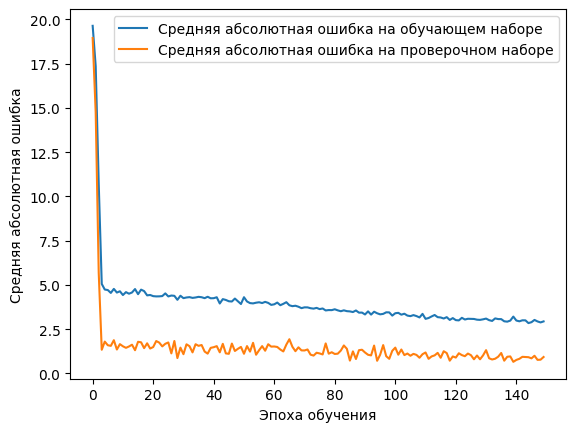

In [ ]:
plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

15/15 [==============================] - 0s 3ms/step
Средняя абсолютная ошибка: 0.8957478541341322
Реальное значение:  20.05  Предсказанное значение:  18.93  Разница:   1.12
Реальное значение:  20.05  Предсказанное значение:  19.20  Разница:   0.85
Реальное значение:  20.13  Предсказанное значение:  19.36  Разница:   0.77
Реальное значение:  20.06  Предсказанное значение:  18.99  Разница:   1.07
Реальное значение:  20.09  Предсказанное значение:  19.10  Разница:   0.99
Реальное значение:  20.07  Предсказанное значение:  19.16  Разница:   0.91
Реальное значение:  20.11  Предсказанное значение:  19.21  Разница:   0.90
Реальное значение:  20.09  Предсказанное значение:  19.57  Разница:   0.52
Реальное значение:  20.01  Предсказанное значение:  19.24  Разница:   0.77
Реальное значение:  20.07  Предсказанное значение:  19.40  Разница:   0.67


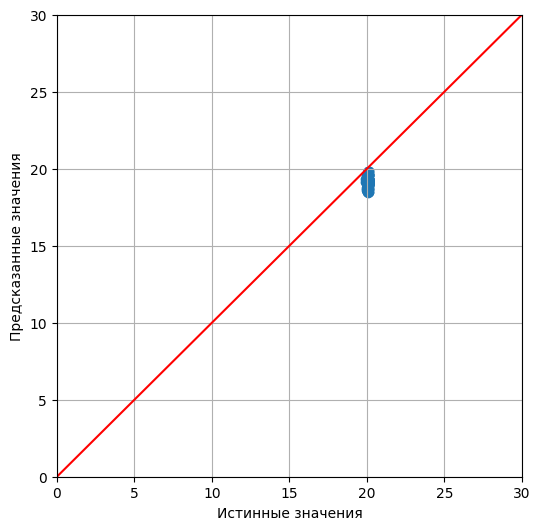

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Предсказание стоимости автомобиля
pred = model.predict([X_test[:464]])

# Преобразование предсказанных значений обратно в исходную шкалу
pred = pred.flatten()  # Преобразование в одномерный массив


# Рассчет средней абсолютной ошибки
mae = mean_absolute_error(y_test[:464], pred)
print('Средняя абсолютная ошибка:', mae)

# Вывод значений и разницы между истинными и предсказанными значениями
for i in range(10):
    print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(float(y_test[:464][i,0]),
                                                                                                float(pred[i]),
                                                                                                abs(float(y_test[:464][i,0]) - float(pred[i]))))


# Построение графика рассеяния
plt.figure(figsize=(6, 6))
plt.scatter(y_test[:464], pred)
plt.xlim(0, 30)  # Ограничение оси по x
plt.ylim(0, 30)  # Ограничение оси по y
plt.plot(plt.xlim(), plt.ylim(), 'r')  # Диагональная линия
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.grid()
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Средняя абсолютная ошибка в процентах: {mean_absolute_percentage_error(pred, y_test)*100:.2f}%')

Средняя абсолютная ошибка в процентах: 4.69%
